In [1]:
import os

In [2]:
class HyperParameters:
    """Hyper-parameters of this project.

    This is a class holding necessary hyperparameters of this project. Instan-
    tiation of the class can get all of the parameters. Note that property
    protection is not constructed, so DO NOT change the values unless you know
    what you are doing.
    """
    def __init__(self):
        self.train_epochs = 700  # General training epochs.
#         self.w_dim = 50  # Word embedding dimension.
        self.w_dim = 300  # Word embedding dimension.
        self.s_len = 20  # Sentence length in the sentence-level models.
        self.e_len = 60  # Essay length in the sentence-level models.
        self.w_window_len = 5  # Convolution window size of word level.
        self.s_window_len = 3  # Convolution window size of sentence level.
        self.w_convunits_size = 64  # Convolution unit number of word level.
        self.s_convunits_size = 32 # Convolution unit number of sentence level.
        self.hidden_size = 100  # Dense layer size of sentence-level models.
        self.batch_size = 20  # Batch size.
        self.learning_rate = 0.006  # Initial learning rate.
        self.dropout_keep_prob = 0.3  # Dropout rate.
        self.d_e_len = 500  # Essay length in the document-level models.
        self.lstm_hidden_size = 150  # Dense layer size of LSTM models.
        self.cnn_lstm_convunits_size = 80  # Conv units of CNN-LSTM models.
        self.cnn_lstm_att_pool_size = 50  # Attention pool size.

class ProjectPaths:
    """Project paths of the application."""
    def __init__(self):
        self.aes_root = "essaysense"  # Temporarily
        self.tfmetadata = os.path.join(self.aes_root, "tfmetadata")
        self.datasets_root = os.path.join(self.aes_root, "datasets")
        self.asap = os.path.join(self.datasets_root, "training_set_rel3.tsv")
        self.asap_train = os.path.join(self.datasets_root, "train.tsv")
        self.asap_dev = os.path.join(self.datasets_root, "dev.tsv")
        self.asap_test = os.path.join(self.datasets_root, "test.tsv")
        self.asap_url = "http://p2u3jfd2o.bkt.clouddn.com/datasets/training_set_rel3.tsv"
#         self.glove = os.path.join(self.datasets_root, "glove.6B.50d.txt")
        self.glove = os.path.join(self.datasets_root, "glove.840B.300d.txt")
        self.glove_url = "http://p2u3jfd2o.bkt.clouddn.com/datasets/glove.6B.50d.txt"

    def model(self, model_name):
        return os.path.join(self.tfmetadata, model_name, "model.ckpt")

    def model_ckpt(self, model_name):
        return os.path.join(self.tfmetadata, model_name)

    def summary(self, model_name):
        return os.path.join(self.tfmetadata, model_name, "summary")


# Variables to export.
hp = hyperparameters = HyperParameters()
paths = ProjectPaths()


In [3]:
ner = ["@PERSON", "@ORGANIZATION", "@LOCATION", "@DATE",
       "@TIME", "@MONEY", "@PERCENT", "@MONTH", "@EMAIL",
       "@NUM", "@CAPS", "@DR", "@CITY", "@STATE"]


In [4]:
import codecs
import numpy as np

In [5]:
from tqdm import tqdm

In [135]:
with codecs.open(paths.glove, 'r', 'UTF-8') as glove_file:
    glove_vectors = {}
    # Add numbers and NER embedding entries.
#     for i in ner:
#         glove_vectors[i] = np.random.randn(hp.w_dim)
    for item in tqdm(glove_file.readlines()):
        item_lst = item.strip().split(' ')
        word = item_lst[0]
        vec = [float(i) for i in item_lst[1:hp.w_dim+2]]
        glove_vectors[word] = np.array(vec)
        


 13%|█▎        | 294310/2196018 [00:26<02:47, 11384.36it/s]


 27%|██▋       | 591593/2196018 [00:52<02:23, 11216.37it/s]


 40%|████      | 886051/2196018 [01:19<01:58, 11029.44it/s]


 54%|█████▎    | 1178327/2196018 [01:45<01:32, 11029.12it/s]


 67%|██████▋   | 1470564/2196018 [02:11<01:03, 11412.57it/s]


 80%|████████  | 1762294/2196018 [02:37<00:38, 11408.50it/s]


 94%|█████████▎| 2054423/2196018 [03:02<00:12, 11433.30it/s]


100%|██████████| 2196018/2196018 [03:15<00:00, 11238.67it/s]

In [ ]:
len(glove_vectors)

In [ ]:
import re

In [216]:
def document_level_tokenize(essay_text):
    essay_text = essay_text.encode('ascii', errors='ignore').decode('utf-8', errors='ignore')
    essay_text = essay_text.lower()  # Use lower-cases for word embeddings.
    essay_text = essay_text.replace('/', ' / ')
    essay_text = essay_text.replace('@', ' ')
    essay_text = essay_text.replace('.', ' . ')
    essay_text = essay_text.replace('-', ' - ')
    essay = nltk.word_tokenize(essay_text)
    essay = list(map(lambda x : (x[:-1] if x[-1].isdigit() else x), essay))
    essay = list(filter(lambda x: len(x) > 0, essay))
    return essay

In [190]:
document_level_tokenize(X['essay'][0])

['dear',
 'local',
 'newspaper',
 ',',
 'i',
 'think',
 'effects',
 'computers',
 'have',
 'on',
 'people',
 'are',
 'great',
 'learning',
 'skills',
 '/',
 'affects',
 'because',
 'they',
 'give',
 'us',
 'time',
 'to',
 'chat',
 'with',
 'friends',
 '/',
 'new',
 'people',
 ',',
 'helps',
 'us',
 'learn',
 'about',
 'the',
 'globe',
 '(',
 'astronomy',
 ')',
 'and',
 'keeps',
 'us',
 'out',
 'of',
 'troble',
 '!',
 'thing',
 'about',
 '!',
 'dont',
 'you',
 'think',
 'so',
 '?',
 'how',
 'would',
 'you',
 'feel',
 'if',
 'your',
 'teenager',
 'is',
 'always',
 'on',
 'the',
 'phone',
 'with',
 'friends',
 '!',
 'do',
 'you',
 'ever',
 'time',
 'to',
 'chat',
 'with',
 'your',
 'friends',
 'or',
 'buisness',
 'partner',
 'about',
 'things',
 '.',
 'well',
 'now',
 '-',
 'there',
 "'s",
 'a',
 'new',
 'way',
 'to',
 'chat',
 'the',
 'computer',
 ',',
 'theirs',
 'plenty',
 'of',
 'sites',
 'on',
 'the',
 'internet',
 'to',
 'do',
 'so',
 ':',
 'organization',
 ',',
 'organization',
 ',

In [192]:
import pandas as pd

X = pd.read_csv('essaysense/datasets/training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')
y = X['domain1_score']

In [193]:
X = X[['essay_set', 'essay']]

In [13]:
X.head()

,essay_set,essay
0,1,"Dear local newspaper, I think effects computer..."
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu..."
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl..."
3,1,"Dear Local Newspaper, @CAPS1 I have found that..."
4,1,"Dear @LOCATION1, I know having computers has a..."


In [14]:
import nltk

In [15]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /localhome/vladislavskripniuk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
for i in range(1, 9):
    eval_set = load_asap(paths.asap_test, domain_id=i)
    eval_set_emb = DocumentLevelTestSet(hyperparameters, glove, eval_set)
    
    model.domain_id = i
    model.test_set = eval_set_emb
    
    tf.reset_default_graph()
    model.evaluate(saved_path='essaysense/tfmetadata/prompt-1-document-level-lstm-with-mot-pooling/')

[Loading] ASAP-AES domain 1 dataset...
INFO:tensorflow:Restoring parameters from essaysense/tfmetadata/prompt-1-document-level-lstm-with-mot-pooling/model.ckpt
[Evaluating prompt-1-document-level-lstm-with-mot-pooling] QWK-on-test-set: 0.715682
[Loading] ASAP-AES domain 2 dataset...
INFO:tensorflow:Restoring parameters from essaysense/tfmetadata/prompt-1-document-level-lstm-with-mot-pooling/model.ckpt
[Evaluating prompt-1-document-level-lstm-with-mot-pooling] QWK-on-test-set: 0.555556
[Loading] ASAP-AES domain 3 dataset...
INFO:tensorflow:Restoring parameters from essaysense/tfmetadata/prompt-1-document-level-lstm-with-mot-pooling/model.ckpt
[Evaluating prompt-1-document-level-lstm-with-mot-pooling] QWK-on-test-set: 0.644049
[Loading] ASAP-AES domain 4 dataset...
INFO:tensorflow:Restoring parameters from essaysense/tfmetadata/prompt-1-document-level-lstm-with-mot-pooling/model.ckpt
[Evaluating prompt-1-document-level-lstm-with-mot-pooling] QWK-on-test-set: 0.594391
[Loading] ASAP-AES d

In [41]:
import numpy as np
np.mean([0.715682, 0.555556, 0.644049, 0.594391, 0.738155, 0.622711, 0.625617, 0.195415])

0.586447

In [36]:
os.environ[ "CUDA_VISIBLE_DEVICES" ] = "4"

In [37]:
import tensorflow as tf
from tensorflow.contrib import rnn as tfrnn

In [34]:
"""An LSTM model for AES task.

    This model treat a piece of essay as a single sequence of words. LSTM cells
    accept the sequence and output a processed sequence. Then mean over time
    (MoT) pooling is performed which converts the feed tensor into an essay
    representation vector. Then a dense layer converts the vector to an
    appropriate score of the essay.

    Network Topology:
        [essay] -> lstm -> mot pooling -> dense -> [prediction score]

    Reference:
        This model basically implemented based on the article "A neural
        Approach to Automated Essay Scoring"
        (Taghipour and Ng, 2016).
    """

def define_graph():
    tf.reset_default_graph()
    essays = tf.placeholder(tf.float32, [None, hp.d_e_len,
                                         hp.w_dim])
    scores = tf.placeholder(tf.float32, [None])

    # Long Short-Term Memory layer
    lstm_cell = tfrnn.BasicLSTMCell(num_units=hp.lstm_hidden_size)
    lstm_cell = tfrnn.DropoutWrapper(
        cell=lstm_cell,
        output_keep_prob=hp.dropout_keep_prob)
    init_state = lstm_cell.zero_state(hp.batch_size, dtype=tf.float32)
    lstm, _ = tf.nn.dynamic_rnn(lstm_cell, essays, dtype=tf.float32)

    # Mean over Time pooling
    mot = tf.reduce_mean(lstm, axis=1)

    # Dense layer
    dense = tf.layers.dense(inputs=mot, units=1, activation=tf.nn.sigmoid)

    # Prediction and Loss
    preds = tf.reshape(dense, [-1])
    tf.summary.histogram('preds', preds)
    loss = tf.losses.mean_squared_error(scores, preds)
    tf.summary.scalar('loss', loss)
    merged_summary = tf.summary.merge_all()

    return (essays,
            scores,
            merged_summary,
            loss,
            preds)


In [226]:
np.mean(qwk_history[20])

0.5656313414968223

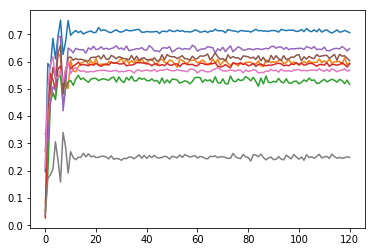

In [219]:
for i in range(8):
    plt.plot(np.array(qwk_history)[:,i])

In [227]:
from matplotlib import pyplot as plt
%matplotlib inline

In [230]:
np.mean(qwk_history[-1])

0.6054066315365174

In [229]:
qwk_history[-1]

[0.7455945301228912,
 0.6104342840762504,
 0.5923507462686568,
 0.6175753364078589,
 0.7329319138303554,
 0.6801170813297095,
 0.520497828404461,
 0.3437513318519555]

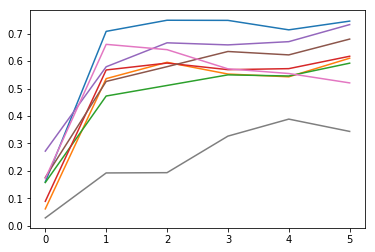

In [228]:
for i in range(8):
    plt.plot(np.array(qwk_history)[:,i])

In [236]:
np.mean(qwk_history[-1])

0.6238822942768547

In [237]:
qwk_history[-1]

[0.7899897662956079,
 0.5958062526685326,
 0.573892226525571,
 0.6002985417384314,
 0.7346465588262863,
 0.7462437395659433,
 0.5836442640305168,
 0.36653700456394844]

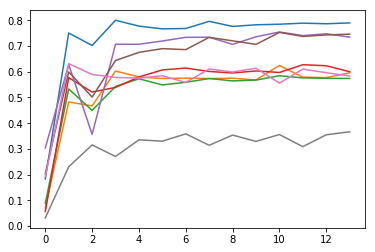

In [235]:
for i in range(8):
    plt.plot(np.array(qwk_history)[6:,i])

In [344]:
qwk_history[-1]

[0.7307916701394264,
 0.5661945175503446,
 0.622847089996887,
 0.644452831107486,
 0.7526286411842386,
 0.7451064745106475,
 0.6740700894547049,
 0.3990762339896641]

In [343]:
np.mean(qwk_history[-1])

0.6418959434916749

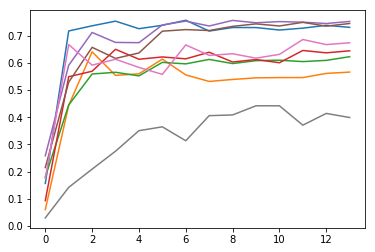

In [342]:
for i in range(8):
    plt.plot(np.array(qwk_history)[6+14:,i])

In [ ]:
qwk_history

In [215]:
results

0.559396256191285

In [224]:
qwk_history = []

In [340]:

(essays,
 scores,
 merged_summary,
 loss,
 preds) = define_graph()
g_step = tf.Variable(0, dtype=tf.int32, trainable=False)
learning_rate = tf.train.exponential_decay(hp.learning_rate,
                                           global_step=g_step,
                                           decay_steps=10,
                                           decay_rate=0.93)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    train_op = optimizer.minimize(loss=loss, global_step=g_step)

saver = tf.train.Saver()
sess = tf.Session()
# summary_writer = tf.summary.FileWriter(summary_path, sess.graph)
sess.run(tf.global_variables_initializer())
for counter in range(700):#hp.train_epochs):
    (train_essays,
     train_scores) = next_batch(train_gen, hp.batch_size)
    t_loss,_ = sess.run([loss, train_op],
             feed_dict={essays: train_essays, scores: train_scores})
    
    if counter % 50 == 0:
        print("Train: {:3d}, train-Loss: {:.6f} , test-Loss: {:.6f}"
              .format(g_step_got, t_loss, loss_got))
        (g_step_got, summary_got, loss_got, preds_got) = sess.run([g_step, merged_summary, loss, preds], 
                                                        feed_dict={essays: all_test_essays, scores: all_test_scores})
        
        
        results = []
        for i in range(1, 9):
            rescaled_preds = (preds_got[X_test['essay_set'] == i] * float(score_range[i][1] - score_range[i][0])) + score_range[i][0]
            rescaled_preds = np.array(np.around(rescaled_preds), dtype=int)
            results.append(cohen_kappa_score(rescaled_preds, y_test[X_test['essay_set'] == i], weights='quadratic'))
        
        print("QWK: ", results)
        
        qwk_history.append(results)
#     summary_writer.add_summary(summary_got, g_step_got)
#     if g_step_got % 100 == 0:
#         saver.save(sess, save_path)

Train: 651, train-Loss: 0.043527 , test-Loss: 0.023260
QWK:  [0.15649135977132633, 0.060380143239637585, 0.18021375260386685, 0.09324408285757824, 0.25822213196029, 0.21497974702417932, 0.17447630761306132, 0.029594027805370904]
Train:   1, train-Loss: 0.019817 , test-Loss: 0.099192
QWK:  [0.7175458580462705, 0.44375006151029917, 0.445222194895855, 0.5491795292905955, 0.5913328839084699, 0.529230131115054, 0.6675146166211603, 0.14202047568449505]
Train:  51, train-Loss: 0.032164 , test-Loss: 0.033112
QWK:  [0.736527174691034, 0.6408553313818406, 0.5592331315119148, 0.5693783828112187, 0.7120071232622894, 0.6572864704314383, 0.5917410744675291, 0.20914563949648035]
Train: 101, train-Loss: 0.049295 , test-Loss: 0.027322
QWK:  [0.7536371628711608, 0.5539849920455024, 0.5655017753690899, 0.6500730626128173, 0.6753925308730653, 0.6164874551971327, 0.6134004276707299, 0.27509475059899813]
Train: 151, train-Loss: 0.017735 , test-Loss: 0.026808
QWK:  [0.7258731059071388, 0.5598691908433591, 0.

In [ ]:
save_path = paths.model('LSTM_with_typos_all')


In [68]:
from sklearn.metrics import cohen_kappa_score

In [41]:
for i in range(1, 9):
    print(i, cohen_kappa_score(y[X['essay_set']==i],y[X['essay_set']==i],weights='quadratic'))

1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0


In [210]:
cohen_kappa_score(y[X['essay_set']==3],np.zeros_like(y[X['essay_set']==3])+2,weights='quadratic')

0.0

In [43]:
for i in range(1, 9):
    print(i, cohen_kappa_score(y[X['essay_set']==i],np.random.permutation(y[X['essay_set']==i]),weights='quadratic'))

1 -0.027897438515653628
2 0.0548243085185246
3 -0.007651668627855379
4 0.025835462331646464
5 0.003680718522134141
6 0.025889738506560955
7 -0.018870522366808418
8 -0.013781584538247404


In [62]:
for i in range(1, 9):
    print(i, cohen_kappa_score(y[X['essay_set']==i],y[X['essay_set']==i].max() + y[X['essay_set']==i].min() - y[X['essay_set']==i],weights='quadratic'))

1 -0.33618322911765763
2 -0.9767647674063111
3 -0.732522361942451
4 -0.9896928800347866
5 -0.7380419762717716
6 -0.4759401536595229
7 -0.5283473015623723
8 -0.8066342002976146


In [194]:
score_range = {1: (2, 12),
               2: (1, 6),
               3: (0, 3),
               4: (0, 3),
               5: (0, 4),
               6: (0, 4),
               7: (0, 30),
               8: (0, 60)}

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
def normalize_score(score, essay_set):
    return (float(score) - score_range[essay_set][0]) / float(score_range[essay_set][1] - score_range[essay_set][0])

In [240]:
corrections_dict = np.load('corrections_dict.npy').reshape(1,)[0]

In [241]:
corrections_dict

{'kohar': 'kohat',
 'categoriazation': 'categorization',
 'gamertop': 'gamestop',
 'foreverly': 'foreverla',
 "'vulgar": 'vulgar',
 'troubleing': 'troubling',
 'disrptintt': 'disrptintt',
 'libararies': 'libraries',
 'disision': 'division',
 'fatler': 'father',
 'indudging': 'indulging',
 'commodly': 'commonly',
 'doeuments': 'documents',
 'obstact': 'obstat',
 'patoient': 'patient',
 'immedlatly': 'immediatly',
 'trowoling': 'troweling',
 'passionte': 'passionate',
 'movign': 'moving',
 'caradable': 'cartable',
 'egualily': 'equally',
 'wrat': 'what',
 'contruy': 'contry',
 'gratfull': 'gratefull',
 'caladers': 'calanders',
 'taughht': 'taught',
 'dardine': 'jardine',
 'ozzed': 'oozed',
 'caps11s': 'caps1',
 'courageus': 'courageous',
 'phisicly': 'physicly',
 'psycalogical': 'psycological',
 'cheerig': 'cheering',
 'flustrated': 'frustrated',
 "caps11't": "caps11't",
 "does'ent": 'doesent',
 'surnus': 'burnus',
 'pixers': 'pixels',
 'civillesation': 'civilisation',
 'hobster': 'jobst

In [242]:
cnt_corrections = 0

In [269]:
X['essay'][0]

"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the econom

In [282]:
document_level_tokenize(X['essay'][12444])

['due',
 'you',
 'think',
 'that',
 'being',
 'part',
 'of',
 'sameting',
 'funing',
 '?',
 'well',
 'sam',
 'times',
 'is',
 'not',
 'breey',
 'fun',
 '.',
 'becaes',
 'you',
 'are',
 'in',
 'adefokil',
 'stoeshl',
 '.',
 'i',
 'think',
 'that',
 'being',
 'in',
 'a',
 'reationship',
 'is',
 'evre',
 'in',
 'porto',
 'to',
 'trass',
 'the',
 'othre',
 'prsad',
 '.',
 'becaes',
 'if',
 'ther',
 'in',
 'no',
 'thast',
 'the',
 'is',
 'no',
 'relshonsip',
 '.',
 'the',
 'other',
 'pepolp',
 'month',
 'tray',
 'to',
 'kip',
 'then',
 'opert',
 '.',
 'ther',
 'or',
 'same',
 'peopl',
 'that',
 'you',
 'can',
 'tust',
 '.',
 'ther',
 'are',
 'going',
 'tho',
 'halolp',
 'you',
 '.',
 'they',
 'will',
 'tall',
 'you',
 'wat',
 'the',
 'other',
 'peolepa',
 'are',
 'saind',
 'obut',
 'you',
 'and',
 'the',
 'other',
 'per',
 '.',
 'the',
 'peorson',
 'will',
 'on',
 'my',
 'oping',
 'is',
 'the',
 'you',
 'can',
 'get',
 'allong',
 'whe',
 'alt',
 'of',
 'peopl',
 '.',
 'if',
 'you',
 'new',


In [281]:
glove_vectors['sameting']

KeyError: 'sameting'

In [323]:
lens = [len(document_level_tokenize(x)) for x in X['essay']]

In [336]:
def data_generator(data, labels):
    cnt_corrections = 0
    set_size = len(data)
    i_item = 0
    while True:
        if i_item >= set_size:
            i_item = 0
            
        item = data.iloc[i_item]
        label = labels.iloc[i_item]
        
        essay_text = document_level_tokenize(item['essay'])
#         print(essay_text)
        embedded = np.zeros([hp.d_e_len, hp.w_dim])
        for i in range(min(len(essay_text), hp.d_e_len)):
#         for i in range(len(essay_text)):
            if essay_text[i] in corrections_dict.keys():
                essay_text[i] = corrections_dict[essay_text[i]]
            
            embedded[i] = glove_vectors.get(essay_text[i], np.zeros(hp.w_dim))
            
        i_item += 1
        
        yield (embedded, normalize_score(label, item["essay_set"]))

In [271]:
def data_generator(data, labels):
    set_size = len(data)
    i_item = 0
    while True:
        if i_item >= set_size:
            i_item = 0
            
        item = data.iloc[i_item]
        label = labels.iloc[i_item]
        
        essay_text = document_level_tokenize(item['essay'])
        embedded = np.zeros([hp.d_e_len, hp.w_dim])
        for i in range(min(len(essay_text), hp.d_e_len)):
            embedded[i] = glove_vectors.get(essay_text[i], np.zeros(hp.w_dim))
            
        i_item += 1
        
        yield (embedded, normalize_score(label, item["essay_set"]))

In [337]:
def next_batch(gen, size_demand):
    essays_batched = []
    scores_batched = []
    for _ in range(size_demand):
        next_item = next(gen)  # Generate next item
        essays_batched.append(next_item[0])
        scores_batched.append(next_item[1])
    essays_batched = np.array(essays_batched)
    scores_batched = np.array(scores_batched)
    return essays_batched, scores_batched

In [333]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, stratify=X['essay_set'])


In [297]:
X['essay'][12444:12445]

12444       DUE you think that being part of sameting f...
Name: essay, dtype: object

In [303]:
12444 in X_train.index

True

In [338]:
train_gen = data_generator(X_train, y_train)
test_gen = data_generator(X_test, y_test)

In [295]:
X_test['essay'].iloc[0]

'I disagree that certain material, books,movies, or magazines should be removed that are offensive to some from the shelves of libraries. There are three reasons why I argue this topic. One reason is that books, music, etc. that are inappropiate should not be in a section that a child would go and look for a book. A second reason is that for a child to check-out a book and the book is inappropiate, they should have identification to show that they are of age. The third reason I think that things like that should stay on shelves is because adults have books, movies, music,etc. for them for many reasons.     Ther should be nothing inappropiate in a library that a child can get a hold of. A child should only have things appropiate that they can grab so parents do not have to be worried about the things they child hear, see, or read. There are some libraries that will let a child get a magazine or book, and let the child check the book or magazine out. This is where th problem begin.     A

In [339]:
(all_test_essays,
 all_test_scores) = next_batch(test_gen, len(X_test.index))

In [261]:
corrections_dict.keys()

dict_keys(['kohar', 'categoriazation', 'gamertop', 'foreverly', "'vulgar", 'troubleing', 'disrptintt', 'libararies', 'disision', 'fatler', 'indudging', 'commodly', 'doeuments', 'obstact', 'patoient', 'immedlatly', 'trowoling', 'passionte', 'movign', 'caradable', 'egualily', 'wrat', 'contruy', 'gratfull', 'caladers', 'taughht', 'dardine', 'ozzed', 'caps11s', 'courageus', 'phisicly', 'psycalogical', 'cheerig', 'flustrated', "caps11't", "does'ent", 'surnus', 'pixers', 'civillesation', 'hobster', 'skiming', 'coomputers', 'hurgry', 'edattor', 'apparpment', 'neiborgs', 'offesnsive', 'gbost', 'derrogitory', 'ushelly', 'fergranted', 'intsense', 'reponters', 'renevations', 'dwoton', 'halolp', 'liabarean', "'mistakes", 'disrey', 'tlead', 'retelers', 'outlit', 'posission', 'grocry', 'triputing', 'dumbn', 'carrears', 'mible', 'faceded', 'hoadaks', 'averthing', 'gandala', 'mappriate', 'wandng', 'simally', 'welcomeing', 'asures', 'seanic', 'boaght', 'michenie', 'librariean', 'montoir', 'faldoodle', 

In [260]:
cnt_corrections

0

In [201]:
(test_essays,
 test_scores) = next_batch(test_gen, len(X_test.index))

In [202]:
(g_step_got,
 summary_got,
 loss_got,
 preds_got) = sess.run([g_step,
                        merged_summary,
                        loss,
                        preds], feed_dict={essays: test_essays,
                                           scores: test_scores})

In [203]:
from matplotlib import pyplot as plt
%matplotlib inline

(array([170., 263., 276., 331., 319., 320., 303., 287., 209., 118.]),
 array([0.24319369, 0.31854028, 0.39388686, 0.46923342, 0.54458004,
        0.6199266 , 0.69527316, 0.77061975, 0.84596634, 0.9213129 ,
        0.9966595 ], dtype=float32),
 <a list of 10 Patch objects>)

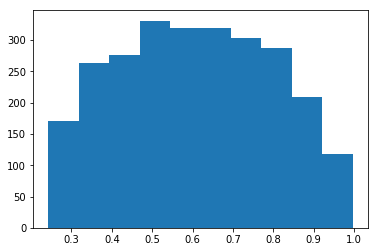

In [204]:
plt.hist(preds_got)

(array([100.,   2., 149., 282., 252., 651., 419., 328., 119., 294.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

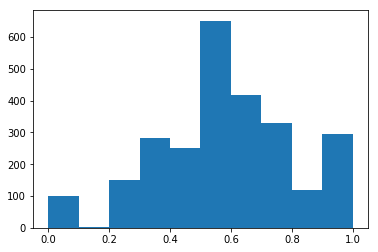

In [205]:
plt.hist(test_scores)

In [197]:
results = []

for i in range(1, 9):
    rescaled_preds = (test_scores[X_test['essay_set'] == i] * float(score_range[i][1] - score_range[i][0])) + score_range[i][0]
    rescaled_preds = np.array(np.around(rescaled_preds), dtype=int)
    results.append(cohen_kappa_score(rescaled_preds, y_test[X_test['essay_set'] == i], weights='quadratic'))

In [198]:
results

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [206]:
results = []

for i in range(1, 9):
    rescaled_preds = (preds_got[X_test['essay_set'] == i] * float(score_range[i][1] - score_range[i][0])) + score_range[i][0]
    rescaled_preds = np.array(np.around(rescaled_preds), dtype=int)
    results.append(cohen_kappa_score(rescaled_preds, y_test[X_test['essay_set'] == i], weights='quadratic'))

In [207]:
results

[0.7518936182887097,
 0.617740232312566,
 0.5653063681232695,
 0.6124745417515275,
 0.6941531404010869,
 0.6399862851918168,
 0.5488629043277959,
 0.1770384093174271]

In [19]:
chosen_set = 8

In [20]:
X.head()

,essay_set,essay
0,1,"Dear local newspaper, I think effects computer..."
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu..."
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl..."
3,1,"Dear Local Newspaper, @CAPS1 I have found that..."
4,1,"Dear @LOCATION1, I know having computers has a..."


In [21]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test =  train_test_split(X[X['essay_set'] == chosen_set],
                                                     y[X['essay_set'] == chosen_set], 
                                                    test_size=0.2, 
                                                    random_state=42, stratify=X[X['essay_set'] == chosen_set]['essay_set'])


In [137]:
train_gen = data_generator(X_train, y_train)
test_gen = data_generator(X_test, y_test)

In [138]:
(all_test_essays,
 all_test_scores) = next_batch(test_gen, len(X_test.index))

In [167]:
(t1, t2) = next_batch(data_generator(X[X['essay_set'] == chosen_set], y[X['essay_set'] == chosen_set]), len(y[X['essay_set'] == chosen_set]))

In [119]:
tx = np.load('t.npy')

In [141]:
t1[0][14]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [129]:
tx[14]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [128]:
np.where(1-(np.mean(tx, axis=1) == np.mean(t1[0], axis=1)))

(array([ 14,  73, 154, 203, 225, 266, 281, 290, 314, 316, 322, 324, 332,
        348, 360, 369, 375, 384, 394, 464, 481]),)

In [120]:
np.mean(tx)

-0.001803748290538

In [161]:
np.mean(t1[10])

0.0020075759574466672

In [169]:
preds_got = sess.run([preds],feed_dict={essays: t1})

In [31]:
qwk_history = []

In [32]:
from sklearn.metrics import cohen_kappa_score

In [41]:
(essays,
 scores,
 merged_summary,
 loss,
 preds) = define_graph()

In [42]:
sess = tf.Session()

In [43]:
sess.run(tf.global_variables_initializer())

In [133]:
preds_got = sess.run([preds],feed_dict={essays: np.zeros((1, 500, 300))})
        
        

In [163]:
preds_got = sess.run(preds, feed_dict={essays: all_test_essays, scores: all_test_scores})
        

In [182]:
i=8
rescaled_preds = (preds_got[0] * float(score_range[i][1] - score_range[i][0])) + score_range[i][0]
rescaled_preds = np.array(np.around(rescaled_preds), dtype=int)

In [170]:
i=8
rescaled_preds = (preds_got[X_test['essay_set'] == i] * float(score_range[i][1] - score_range[i][0])) + score_range[i][0]
rescaled_preds = np.array(np.around(rescaled_preds), dtype=int)

TypeError: list indices must be integers or slices, not Series

In [186]:
cohen_kappa_score(rescaled_preds, y[X['essay_set'] == i], weights='quadratic')
        

0.7207024220689353

In [96]:
glove_vectors['a']

array([ 4.3798e-02,  2.4779e-02, -2.0937e-01,  4.9745e-01,  3.6019e-01,
       -3.7503e-01, -5.2078e-02, -6.0555e-01,  3.6744e-02,  2.2085e+00,
       -2.3389e-01, -6.8360e-02, -2.2355e-01, -5.3989e-02, -1.5198e-01,
       -1.7319e-01,  5.3355e-02,  1.6485e+00, -4.7991e-02, -8.5311e-02,
       -1.5712e-01, -6.4425e-01, -3.9819e-01,  2.7800e-01,  1.5364e-01,
        3.1678e-02,  5.5414e-02,  1.5939e-02,  3.1851e-01, -5.8979e-02,
        3.8584e-02,  1.0770e-01,  1.0410e-01, -7.7346e-02,  3.7396e-01,
       -2.1482e-01,  3.8320e-01, -2.7737e-01, -1.8352e-01, -8.3838e-01,
        3.4124e-01,  5.8164e-01,  1.8543e-01, -3.1028e-01,  1.7666e-01,
       -6.9421e-02, -3.4422e-01, -1.3665e-01, -1.0823e-01,  2.3637e-01,
       -3.2923e-01,  6.1348e-01,  1.9720e-01,  8.7123e-02,  1.0785e-01,
        3.0730e-01,  1.3757e-01,  3.0809e-01,  2.4331e-01, -2.9422e-01,
       -9.8214e-03,  5.5675e-01, -4.8880e-02,  9.9468e-02,  3.0543e-01,
       -3.7597e-01, -1.9525e-01,  4.6246e-02, -3.6675e-02,  3.40

In [139]:
"""Train the model using given train set.

        Args:
            - save_path: choose the model's checkpoint saving path. Default is
                         None, which means the train result would not be saved.
            - summary_path: choose the model's TensorBoard summary saving path.
                            Default is the path generated corresponding to your
                            system time.
        """

# save_path = paths.model('LSTM')

(essays,
 scores,
 merged_summary,
 loss,
 preds) = define_graph()
g_step = tf.Variable(0, dtype=tf.int32, trainable=False)
learning_rate = tf.train.exponential_decay(hp.learning_rate,
                                           global_step=g_step,
                                           decay_steps=10,
                                           decay_rate=0.93)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    train_op = optimizer.minimize(loss=loss, global_step=g_step)

saver = tf.train.Saver()
# sess = tf.Session()

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

# summary_writer = tf.summary.FileWriter(summary_path, sess.graph)
sess.run(tf.global_variables_initializer())
for counter in tqdm(range(300)):#hp.train_epochs):
    (train_essays,
     train_scores) = next_batch(train_gen, hp.batch_size)
    t_loss,_ = sess.run([loss, train_op],
             feed_dict={essays: train_essays, scores: train_scores})

    (test_essays,
     test_scores) = next_batch(test_gen, hp.batch_size)

    (g_step_got,
     summary_got,
     loss_got,
     preds_got) = sess.run([g_step,
                            merged_summary,
                            loss,
                            preds], feed_dict={essays: test_essays,
                                               scores: test_scores})
#     qwk_value = qwk(preds_got, test_scores, self.domain_id)
#     print("Train: {:3d},   Loss: {:.6f},   QWK-on-dev-set: {:.6f}"
#           .format(g_step_got, loss_got, qwk_value))
    if counter % 50 == 0:
        print("Train: {:3d}, train-Loss: {:.6f} , test-Loss: {:.6f}"
              .format(g_step_got, t_loss, loss_got))
        (g_step_got, summary_got, loss_got, preds_got) = sess.run([g_step, merged_summary, loss, preds], 
                                                        feed_dict={essays: all_test_essays, scores: all_test_scores})
        
        
        results = []
#         for i in range(1, 9):
        for i in range(chosen_set, chosen_set+1):
            rescaled_preds = (preds_got[X_test['essay_set'] == i] * float(score_range[i][1] - score_range[i][0])) + score_range[i][0]
            rescaled_preds = np.array(np.around(rescaled_preds), dtype=int)
            results.append(cohen_kappa_score(rescaled_preds, y_test[X_test['essay_set'] == i], weights='quadratic'))
        
        print("QWK: ", results)
        
        qwk_history.append(results)
#     summary_writer.add_summary(summary_got, g_step_got)
#     if g_step_got % 100 == 0:
#         saver.save(sess, save_path)


  0%|          | 0/300 [00:00<?, ?it/s]

Train:   1, train-Loss: 0.014960 , test-Loss: 0.107331



  0%|          | 1/300 [00:01<09:26,  1.90s/it]

QWK:  [0.024077131586541456]



 17%|█▋        | 50/300 [00:56<04:31,  1.09s/it]

Train:  51, train-Loss: 0.004142 , test-Loss: 0.005347



 17%|█▋        | 51/300 [00:57<05:00,  1.21s/it]

QWK:  [0.44008540558942855]



 33%|███▎      | 100/300 [01:50<03:36,  1.08s/it]

Train: 101, train-Loss: 0.003675 , test-Loss: 0.005577



 34%|███▎      | 101/300 [01:51<03:56,  1.19s/it]

QWK:  [0.5790251107828657]



 50%|█████     | 150/300 [02:44<02:46,  1.11s/it]

Train: 151, train-Loss: 0.004471 , test-Loss: 0.007664



 50%|█████     | 151/300 [02:46<03:06,  1.25s/it]

QWK:  [0.6117089122815429]



 67%|██████▋   | 200/300 [03:38<01:44,  1.05s/it]

Train: 201, train-Loss: 0.003570 , test-Loss: 0.006126



 67%|██████▋   | 201/300 [03:39<01:52,  1.14s/it]

QWK:  [0.6050854702471242]



 83%|████████▎ | 250/300 [04:31<00:54,  1.08s/it]

Train: 251, train-Loss: 0.005847 , test-Loss: 0.006486



 84%|████████▎ | 251/300 [04:33<00:57,  1.18s/it]

QWK:  [0.6094049762039799]



100%|██████████| 300/300 [05:26<00:00,  1.06s/it]


In [97]:
all_test_essays[0,0]

array([ 1.8733e-01,  4.0595e-01, -5.1174e-01, -5.5482e-01,  3.9716e-02,
        1.2887e-01,  4.5137e-01, -5.9149e-01,  1.5591e-01,  1.5137e+00,
       -8.7020e-01,  5.0672e-02,  1.5211e-01, -1.9183e-01,  1.1181e-01,
        1.2131e-01, -2.7212e-01,  1.6203e+00, -2.4884e-01,  1.4060e-01,
        3.3099e-01, -1.8061e-02,  1.5244e-01, -2.6943e-01, -2.7833e-01,
       -5.2123e-02, -4.8149e-01, -5.1839e-01,  8.6262e-02,  3.0818e-02,
       -2.1253e-01, -1.1378e-01, -2.2384e-01,  1.8262e-01, -3.4541e-01,
        8.2611e-02,  1.0024e-01, -7.9550e-02, -8.1721e-01,  6.5621e-03,
        8.0134e-02, -3.9976e-01, -6.3131e-02,  3.2260e-01, -3.1625e-02,
        4.3056e-01, -2.7270e-01, -7.6020e-02,  1.0293e-01, -8.8653e-02,
       -2.9087e-01, -4.7214e-02,  4.6036e-02, -1.7788e-02,  6.4990e-02,
        8.8451e-02, -3.1574e-01, -5.8522e-01,  2.2295e-01, -5.2785e-02,
       -5.5981e-01, -3.9580e-01, -7.9849e-02, -1.0933e-02, -4.1722e-02,
       -5.5576e-01,  8.8707e-02,  1.3710e-01, -2.9873e-03, -2.62

In [39]:
saver = tf.train.Saver()

In [142]:
saver.save(sess, 'models/LSTM8')

'models/LSTM8'

In [67]:
tf.reset_default_graph()
sess.close()
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


In [62]:
saver = tf.train.Saver(tf.trainable_variables())

In [68]:
(essays, scores,
merged_summary,
loss,
preds) = define_graph()


In [69]:
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options), graph=tf.get_default_graph())

In [70]:
sess.run(tf.global_variables_initializer())

In [61]:
tf.trainable_variables()

[<tf.Variable 'rnn/basic_lstm_cell/kernel:0' shape=(450, 600) dtype=float32_ref>,
 <tf.Variable 'rnn/basic_lstm_cell/bias:0' shape=(600,) dtype=float32_ref>,
 <tf.Variable 'dense/kernel:0' shape=(150, 1) dtype=float32_ref>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32_ref>]

In [104]:
tf.get_default_graph().

In [63]:
saver.restore(sess, 'models/LSTM8')

INFO:tensorflow:Restoring parameters from models/LSTM8


In [101]:
from tensorflow.python.tools import inspect_checkpoint as chkp

# print all tensors in checkpoint file
chkp.print_tensors_in_checkpoint_file("models/LSTMx", tensor_name='', all_tensors=True)


tensor_name:  dense/bias
[0.]
tensor_name:  dense/kernel
[[-0.07642443]
 [-0.13206954]
 [-0.17066282]
 [-0.04863106]
 [ 0.10360724]
 [-0.09659565]
 [ 0.06355146]
 [-0.14660496]
 [ 0.174824  ]
 [ 0.09599859]
 [ 0.03920873]
 [ 0.1638084 ]
 [-0.10437497]
 [ 0.15995175]
 [-0.06064969]
 [-0.00824364]
 [ 0.01099998]
 [ 0.16392472]
 [ 0.07020149]
 [ 0.04452784]
 [ 0.08059427]
 [ 0.08272457]
 [ 0.17673507]
 [ 0.18316153]
 [ 0.07112437]
 [ 0.08403432]
 [ 0.05088714]
 [ 0.05853301]
 [-0.14144823]
 [ 0.14123046]
 [-0.08004958]
 [-0.12592173]
 [-0.03868847]
 [-0.19781807]
 [-0.01816498]
 [ 0.19171423]
 [ 0.07257813]
 [ 0.04891536]
 [-0.19569448]
 [ 0.02515019]
 [-0.04480036]
 [ 0.14450839]
 [ 0.08384341]
 [-0.1895564 ]
 [-0.17611718]
 [ 0.1602971 ]
 [ 0.13128522]
 [ 0.03491935]
 [ 0.1870578 ]
 [ 0.09685558]
 [-0.19597882]
 [ 0.02134806]
 [-0.176592  ]
 [ 0.10791269]
 [-0.05749157]
 [ 0.14307794]
 [-0.19703394]
 [-0.1805566 ]
 [-0.17476779]
 [ 0.04729658]
 [ 0.18500736]
 [ 0.00710963]
 [-0.16976614

In [86]:
sess = tf.Session()

In [87]:
sess.run(tf.global_variables_initializer())


In [88]:
essays

<tf.Tensor 'Placeholder:0' shape=(?, 500, 300) dtype=float32>

In [83]:
tf.reset_default_graph()
sess = tf.Session()

In [69]:
from tensorflow.python.saved_model import tag_constants

In [73]:
sess.graph_def

node {
  name: "Placeholder"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
        dim {
          size: 500
        }
        dim {
          size: 300
        }
      }
    }
  }
}
node {
  name: "Placeholder_1"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
node {
  name: "DropoutWrapperInit/Const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 1.0
      }
    }
  }
}
node {
  name: "DropoutWrapperInit/Const_1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
 

In [30]:
sess = tf.Session()
tf.reset_default_graph()

In [31]:
with sess.as_default():
    print(tf.get_default_session())
        
        
    essays = tf.placeholder(tf.float32, [None, hp.d_e_len,
                                         hp.w_dim])
    scores = tf.placeholder(tf.float32, [None])

    # Long Short-Term Memory layer
    lstm_cell = tfrnn.BasicLSTMCell(num_units=hp.lstm_hidden_size)
    lstm_cell = tfrnn.DropoutWrapper(
        cell=lstm_cell,
        output_keep_prob=hp.dropout_keep_prob)
    init_state = lstm_cell.zero_state(hp.batch_size, dtype=tf.float32)
    lstm, _ = tf.nn.dynamic_rnn(lstm_cell, essays, dtype=tf.float32)

    # Mean over Time pooling
    mot = tf.reduce_mean(lstm, axis=1)

    # Dense layer
    dense = tf.layers.dense(inputs=mot, units=1, activation=tf.nn.sigmoid)

    # Prediction and Loss
    preds = tf.reshape(dense, [-1])
    tf.summary.histogram('preds', preds)
    loss = tf.losses.mean_squared_error(scores, preds)
    tf.summary.scalar('loss', loss)
    merged_summary = tf.summary.merge_all()
        
        
    g_step = tf.Variable(0, dtype=tf.int32, trainable=False)
    learning_rate = tf.train.exponential_decay(hp.learning_rate,
                                               global_step=g_step,
                                               decay_steps=10,
                                               decay_rate=0.93)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
        train_op = optimizer.minimize(loss=loss, global_step=g_step)
    saver = tf.train.Saver()
    saver.restore(sess, './models/LSTMtest')

    

INFO:tensorflow:Restoring parameters from ./models/LSTMtest


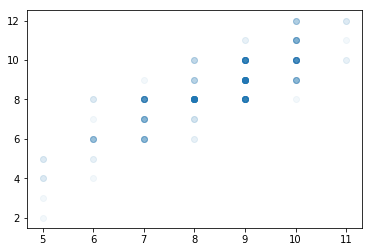

In [250]:
plt.scatter(rescaled_preds, np.array(y_test[X_test['essay_set'] == i]), alpha=0.05)

(15, 60)

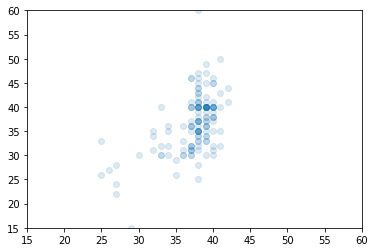

In [263]:
plt.scatter(rescaled_preds, np.array(y_test[X_test['essay_set'] == i]), alpha=0.15)
plt.ylim((15, 60))
plt.xlim((15, 60))

In [73]:
from matplotlib import pyplot as plt
%matplotlib inline

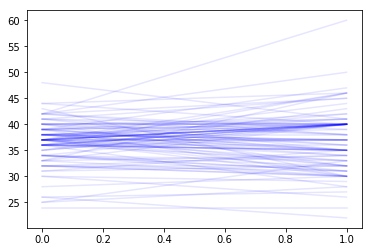

In [77]:
for i in range(100):
    plt.plot((rescaled_preds[i], np.array(y_test[X_test['essay_set'] == chosen_set])[i]), color='blue', alpha=0.1)

In [ ]:
for i in range(len(rescaled_preds)):
    plt.plot((rescaled_preds, np.array(y_test[X_test['essay_set'] == chosen_set])))